In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.sankey import Sankey
from numpy.random import multivariate_normal
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
from matplotlib import rcParams
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import matplotlib.dates as dates
import time
import seaborn as sns
import seaborn.objects as so
import matplotlib.cbook as cbook

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2

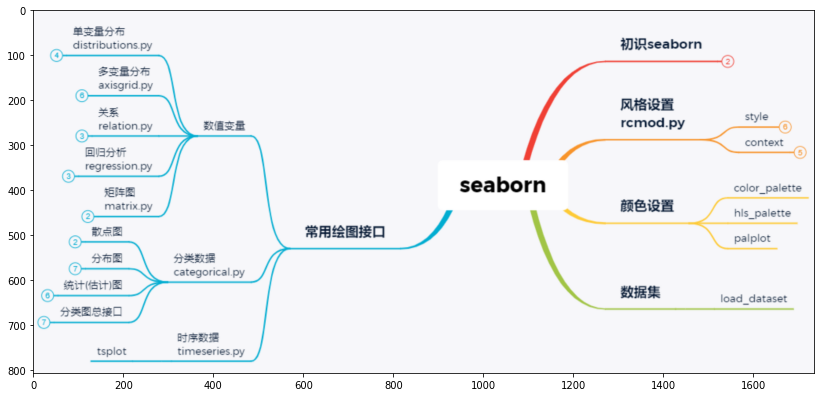

In [2]:
imgw = r"C:\Python\Matplotlib_Note\testin\seaborn_guidline.PNG"    #使用下面这种形式,只能给绝对路径

with cbook.get_sample_data(imgw) as im_file:
    im = plt.imread(im_file)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.imshow(im)

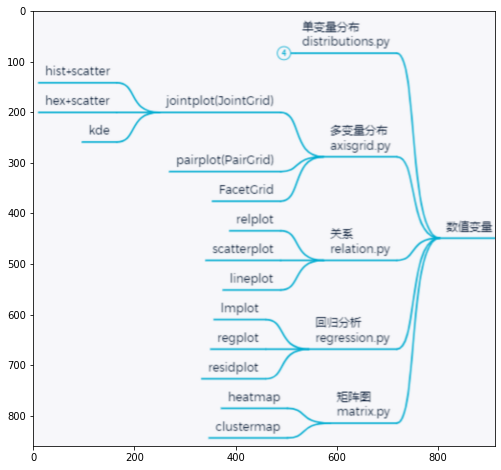

In [3]:
img = r".\testin\seaborn_variance.PNG"

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
im = plt.imread(img)
ax.imshow(im)

In [8]:
dtpath = r".\testin\mc03test.csv"
dt = pd.read_csv(dtpath,index_col=0,parse_dates=True)
dt["hour"] = dt.index.strftime("%Y-%m-%d %H")
dt['day'] = dt.index.date
dt = dt.query("Omega>0.2")
dt.head(1)

,ProductionOrder,BinCode,SubstrateSessionId,MeasureDataId,ContactId,EnvironmentSetPointId,SiteId,LimitsId,EnvironmentSetPointPos,ContactElapsedMs,IsSubstrateGradeProduction,AllWithin,X_OnSubstrate,Y_OnSubstrate,DutFirmwareMajorVersion,DutFirmwareMinorVersion,ResetOnPmCalibrationSuccessful,DeleteCalibrationSuccessful,DeviceId,DeviceIdInternal,T15,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,SetParametersVersionMajor,SetParametersVersionMinor,SetPeakBitShift,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,FanSpeedMedian_Arz,FanVoltageMedian_Arz,FanSpeedStd_Arz,FanVoltageStd_Arz,PmNormRate_Arz,CountRate_Arz,PmNormRateAligned_Arz,FanSpeedMedian_Kcl,FanVoltageMedian_Kcl,FanSpeedStd_Kcl,FanVoltageStd_Kcl,PmNormRate_Kcl,CountRate_Kcl,PmNormRateAligned_Kcl,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,AlphaMc_0p5,AlphaNc_0p5,AlphaMc_1p0,AlphaNc_1p0,AlphaMc_2p5,AlphaNc_2p5,AlphaMc_4p0,AlphaNc_4p0,AlphaMc_10p0,AlphaNc_10p0,BetaMc_0p5,BetaNc_0p5,BetaMc_1p0,BetaNc_1p0,BetaMc_2p5,BetaNc_2p5,BetaMc_4p0,BetaNc_4p0,BetaMc_10p0,BetaNc_10p0,WriteCalibrationSuccessful,Pm2p5NumbConcDutAccuracy_Remeasurement,Pm2p5MassConcDutAccuracy_Remeasurement,Pm2p5NumbConcDutNoise_Remeasurement,Pm2p5MassConcDutNoise_Remeasurement,Pm2p5NumbConcDutMean_Remeasurement,Pm2p5MassConcDutMean_Remeasurement,AutoCleaningInterval_Final,SaturatedBins_Kcl,SaturatedBins_Arz,OmegaInterceptMc_0p5,OmegaInterceptNc_0p5,OmegaInterceptMc_1p0,OmegaInterceptNc_1p0,OmegaInterceptMc_2p5,OmegaInterceptNc_2p5,OmegaInterceptMc_4p0,OmegaInterceptNc_4p0,OmegaInterceptMc_10p0,OmegaInterceptNc_10p0,OmegaInterceptNcDiff_Bin01,OmegaInterceptNcDiff_Bin02,OmegaInterceptNcDiff_Bin03,OmegaInterceptNcDiff_Bin04,OmegaInterceptNcDiff_Bin05,MD5,DutFirmwareMajorVersion_LTL,DutFirmwareMajorVersion_UTL,DutFirmwareMinorVersion_LTL,DutFirmwareMinorVersion_UTL,ResetOnPmCalibrationSuccessful_LTL,ResetOnPmCalibrationSuccessful_UTL,DeleteCalibrationSuccessful_LTL,DeleteCalibrationSuccessful_UTL,DeviceIdInternal_LTL,DeviceIdInternal_UTL,T15_LTL,T15_UTL,ProductionDateIsPass_LTL,ProductionDateIsPass_UTL,ProductionDateIsWritten_LTL,ProductionDateIsWritten_UTL,ReadLmCalibBin_LTL,ReadLmCalibBin_UTL,ReadPmCalibBin_LTL,ReadPmCalibBin_UTL,ReadAllBinsGoodQualityIndicator_LTL,ReadAllBinsGoodQualityIndicator_UTL,AutoCleaningInterval_Reset_LTL,AutoCleaningInterval_Reset_UTL,SetTargetFanSpeed_LTL,SetTargetFanSpeed_UTL,SetUpdateInterval_LTL,SetUpdateInterval_UTL,SetPeakThreshold_LTL,SetPeakThreshold_UTL,SetPeakClippingLimit_LTL,SetPeakClippingLimit_UTL,SetLaserSetPoint_LTL,SetLaserSetPoint_UTL,SetNoiseSuppression_LTL,SetNoiseSuppression_UTL,SetParametersVersionMajor_LTL,SetParametersVersionMajor_UTL,SetParametersVersionMinor_LTL,SetParametersVersionMinor_UTL,SetPeakBitShift_LTL,SetPeakBitShift_UTL,VoltageIn_LTL,VoltageIn_UTL,VoltageSclTx_LTL,VoltageSclTx_UTL,VoltageSdaRx_LTL,VoltageSdaRx_UTL,VoltageIfSelect_LTL,VoltageIfSelect_UTL,VoltageBoot_LTL,VoltageBoot_UTL,VoltageShieldTest_LTL,VoltageShieldTest_UTL,PhotoTicksLaserOff_LTL,PhotoTicksLaserOff_UTL,PhotoTicksLaserOn_LTL,PhotoTicksLaserOn_UTL,PhotoTicksDiff_LTL,PhotoTicksDiff_UTL,FanSpeedMedian_Arz_LTL,FanSpeedMedian_Arz_UTL,FanVoltageMedian_Arz_LTL,FanVoltageMedian_Arz_UTL,FanSpeedStd_Arz_LTL,FanSpeedStd_Arz_UTL,FanVoltageStd_Arz_LTL,FanVoltageStd_Arz_UTL,PmNormRate_Arz_LTL,PmNormRate_Arz

In [9]:
sns.utils.get_data_home()

'C:\\Users\\osun\\AppData\\Local\\seaborn\\seaborn\\Cache'

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
penguins = sns.load_dataset("penguins")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
# glue = sns.load_dataset("glue")

In [8]:
# penguins

In [9]:
sns.__version__

'0.12.2'

# 相关性绘图 Relational plots

## relplot:关系图

In [87]:
dt.filter(like='Count').head(2)

,CountRate_Arz,CountRate_Kcl,CountRate_Arz_LTL,CountRate_Arz_UTL,CountRate_Kcl_LTL,CountRate_Kcl_UTL
StartDateTime,,,,,,
2023-03-02 05:59:20,376.14,198.95,167.0,NaN,167.0,NaN
2023-03-02 05:59:20,400.64,247.05,167.0,NaN,167.0,NaN


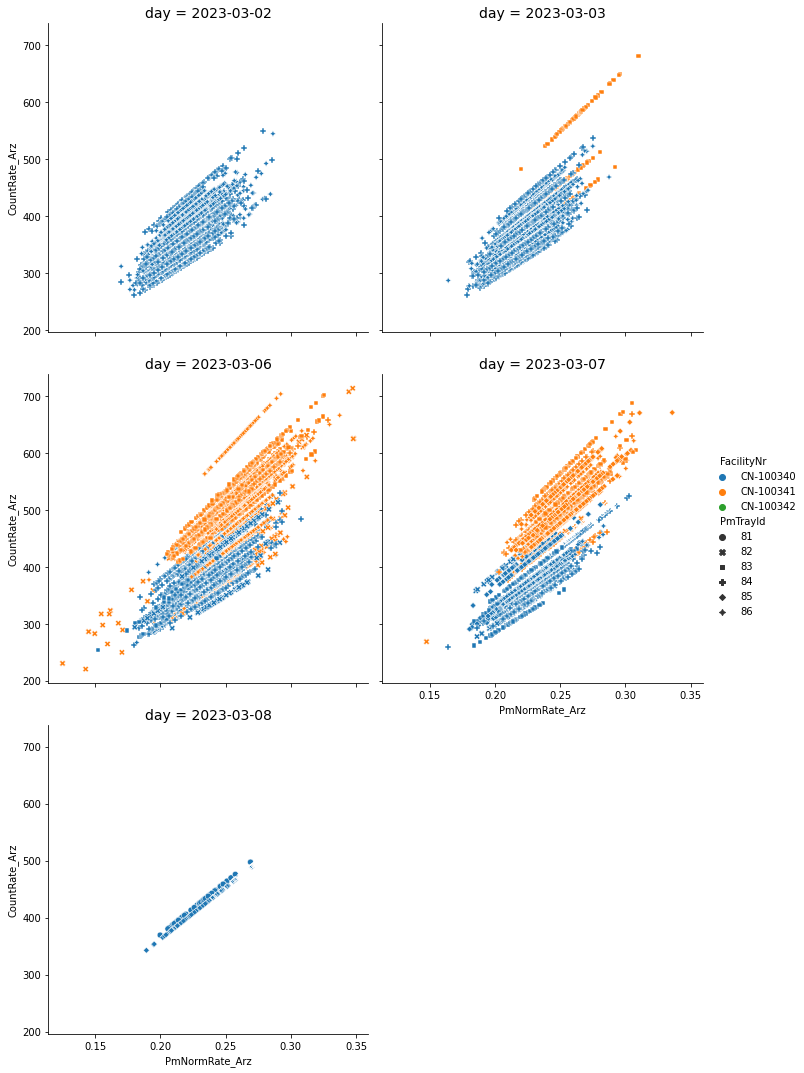

In [88]:
sns.relplot(data=dt,
            x="PmNormRate_Arz",    #第一个维度
            y="CountRate_Arz",   #第二个维度
            hue="FacilityNr",    #第三个维度
            style="PmTrayId",    #第四个维度,用形状区分
#             size="day",          #第五个维度,点的大小,线条的粗细区分
            hue_order=["CN-100340","CN-100341","CN-100342"],     #定义图例中的属性
            col="day",           #第六个维度
#             row="PmTrayId",    #第七个维度
            col_wrap=2,
#             palette=["r","green","blue"],    #自定义颜色
            kind="scatter",      #图形类型,default: scatter; 可选:line,
           )

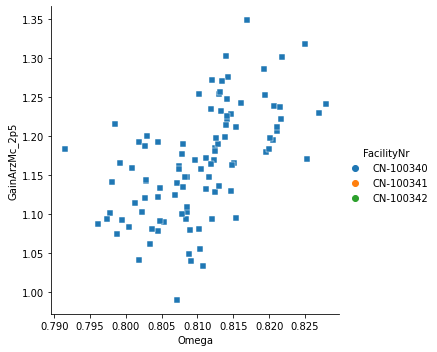

In [107]:
sns.relplot(data=dt.head(100),
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            # units="PmTrayId",
            marker="s",
           )

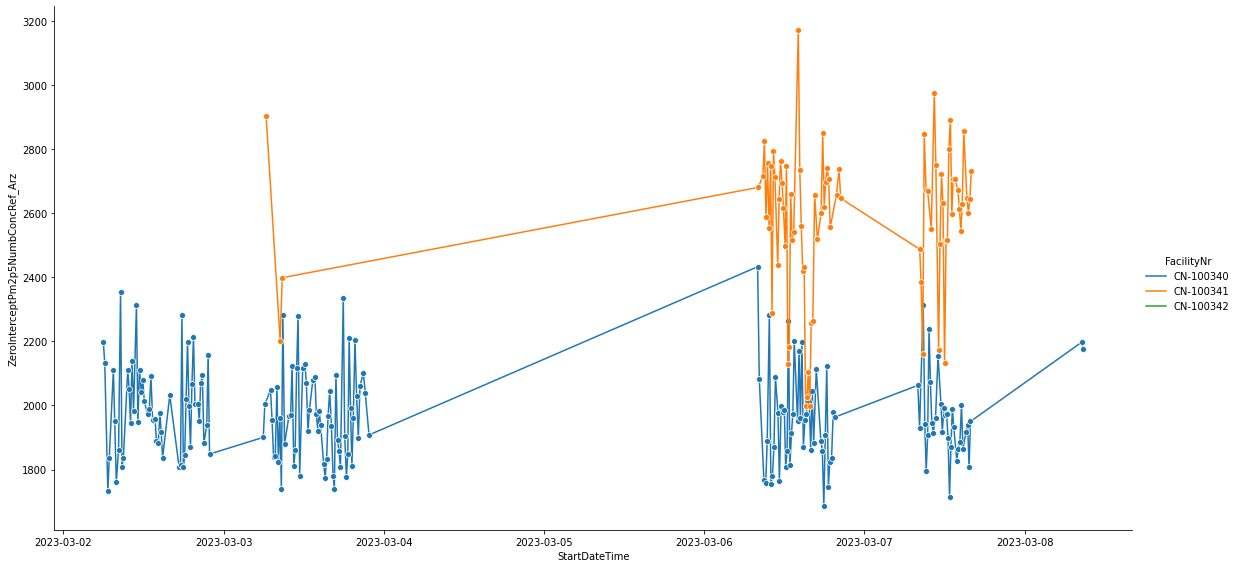

In [109]:
dtl = dt[~dt.index.duplicated()]
sns.relplot(data=dtl,
           x="StartDateTime",
           y="ZeroInterceptPm2p5NumbConcRef_Arz",
            kind='line',
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            height=8,     #axes的高度;
            aspect=2,     #height*aspect = width
            marker="o",
           )
# plt.tick_params(labelrotation=45)
# plt.xticks("")

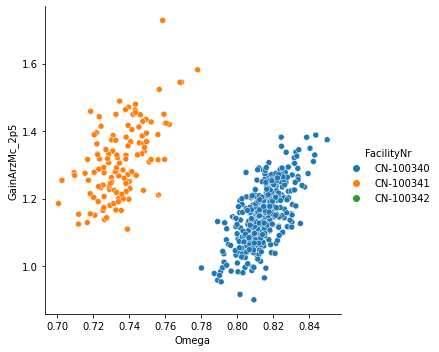

In [116]:
# fig = plt.figure(figsize=(14,8))
# ax = fig.add_subplot()
sns.relplot(data=dt.sample(500),
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            markers=["s","h",">"],
            legend="auto",
            kind="scatter",

           )

## scatterplot:绘制关系型散点图

## lineplot: 线型关系图

<Axes: xlabel='Omega', ylabel='GainArzMc_2p5'>

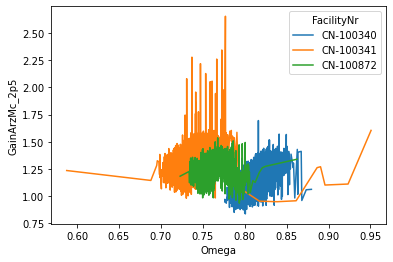

In [117]:
sns.lineplot(data=dt,x="Omega",y="GainArzMc_2p5",
             hue="FacilityNr",
             sort=True,          #
            )

# 分布图 Distribution plots

## displot: 将被废弃

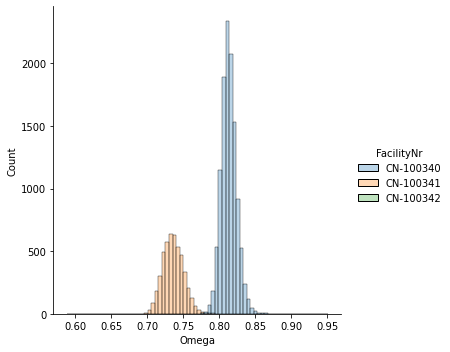

In [7]:
sns.displot(data=dt,
           x="Omega",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
           alpha=0.3,
            
           )

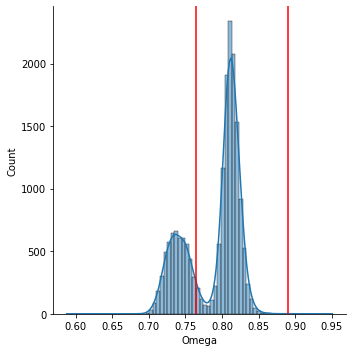

In [8]:
sns.displot(data=dt,
           x="Omega",
           kde=True,
#             hist=True,
           )
plt.axvline(0.765,c='r')
plt.axvline(0.89,c='r')

## histplot:

<Axes: xlabel='Omega', ylabel='Count'>

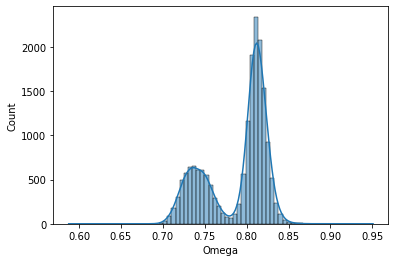

In [12]:
sns.histplot(data=dt,
            x="Omega",
             stat="count",
             kde=True,
            )

(17734, 559)

## kdeplot: 核密度估计图

In [ ]:
dt.head(2)

<Axes: xlabel='Omega', ylabel='Density'>

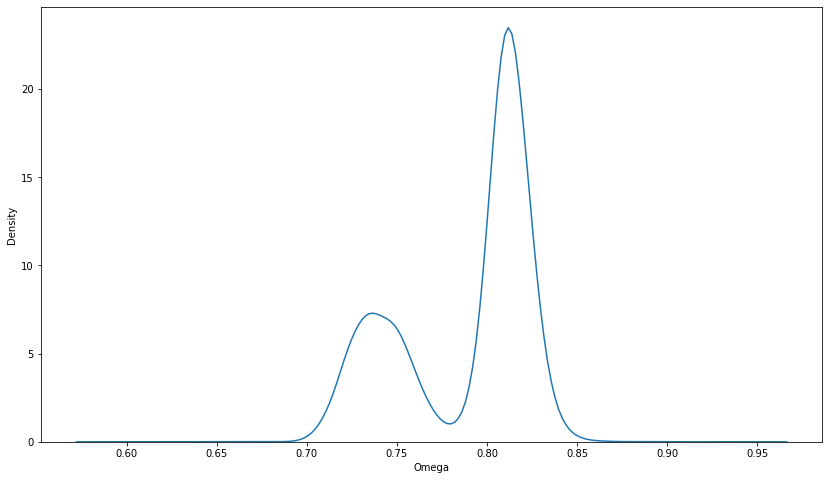

In [13]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",ax=ax,
#            common_norm=True,
           )

<Axes: xlabel='Density', ylabel='Omega'>

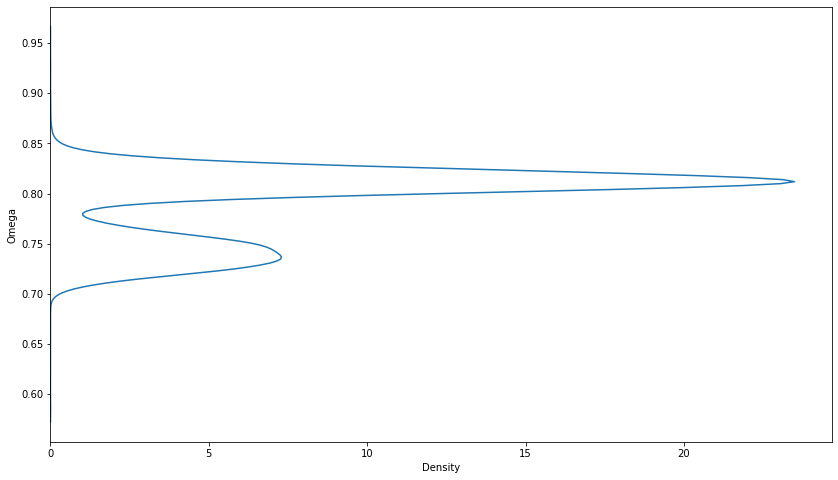

In [14]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,y="Omega",ax=ax)

<Axes: ylabel='Density'>

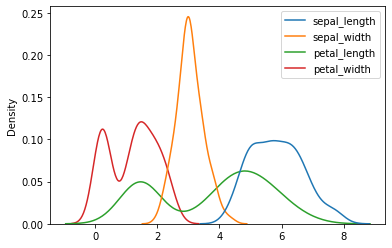

In [17]:
sns.kdeplot(data=iris)   #绘制所有列

<Axes: xlabel='Omega', ylabel='Density'>

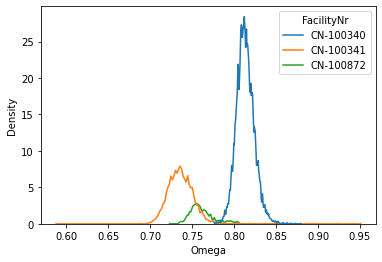

In [19]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
           )

<Axes: xlabel='Omega', ylabel='Density'>

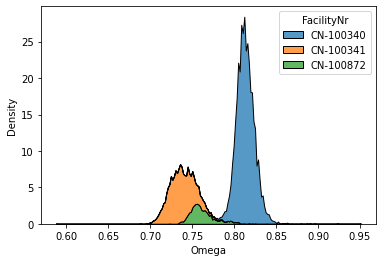

In [20]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
            multiple="stack",     #填充样式 {“layer”, “stack”, “fill”}
           )

<Axes: xlabel='Omega', ylabel='Density'>

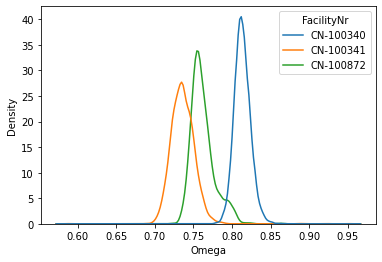

In [21]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()

# 堆积分布:
sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
#             cumulative=True,
            common_norm=False,
            common_grid=True,
            
           )

In [ ]:
tips_agg = (tips.groupby("size").agg(total_bill=("total_bill", "mean"), n=("total_bill", "count")))

In [ ]:
dt.head(2)

In [22]:
dt_agg = dt.groupby("FacilityNr").agg(omega_m = ("Omega","mean"), n=("Omega","count"))

In [23]:
dt_agg

,omega_m,n
FacilityNr,,
CN-100340,0.81,11666
CN-100341,0.74,4758
CN-100872,0.76,1310


<Axes: xlabel='omega_m', ylabel='Density'>

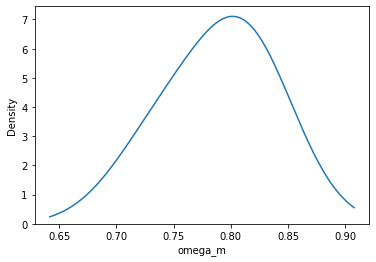

In [24]:
sns.kdeplot(data=dt_agg,
            x="omega_m",
            weights="n",    #权重
           )

<Axes: xlabel='ZeroInterceptPm2p5NumbConcRef_Arz', ylabel='Density'>

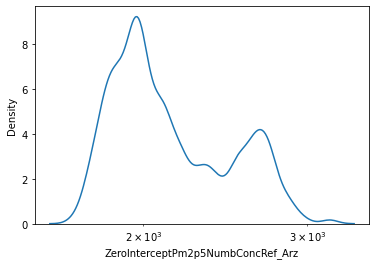

In [26]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPm2p5NumbConcRef_Arz",
            log_scale=True,
           )

<Axes: xlabel='ZeroInterceptPm2p5NumbConcRef_Arz', ylabel='Density'>

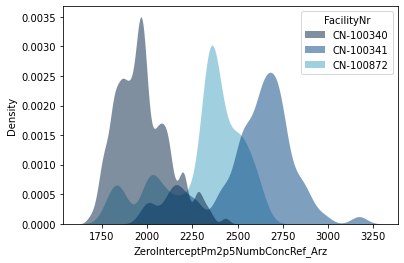

In [28]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPm2p5NumbConcRef_Arz",
            hue="FacilityNr",
            fill=True,
            common_norm=False,    #True: 每一个density总量记为1;False: 所有density总量记为1
            palette="ocean",      #多个density颜色
            alpha=0.5,
            linewidth=0,          #density边线
           )

<Axes: xlabel='ZeroInterceptPm2p5NumbConcRef_Arz', ylabel='Omega'>

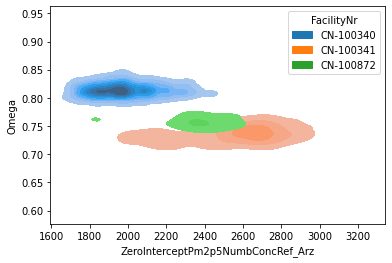

In [29]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPm2p5NumbConcRef_Arz",
            y="Omega",
            hue="FacilityNr",
            fill=True,
           )

<Axes: xlabel='ZeroInterceptPm2p5NumbConcRef_Arz', ylabel='Omega'>

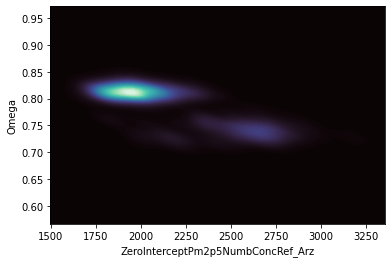

In [30]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPm2p5NumbConcRef_Arz",
            y="Omega",
#             hue="FacilityNr",
            fill=True,
            cmap="mako",
            thresh=0,levels=100,
           )

## ecdfplot:累积分布图

In [ ]:
sns.ecdfplot(data=dt,x="Omega")   #x,y如果不指定,默认会将所有列进行展示

<Axes: xlabel='Omega', ylabel='Proportion'>

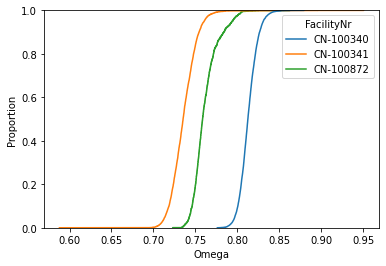

In [31]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr"
            
            )

<Axes: xlabel='Omega', ylabel='Count'>

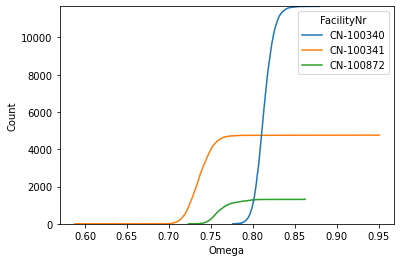

In [32]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count"     #默认的分布统计信息已标准化以显示比例，但是您可以显示绝对计数
            )

<Axes: xlabel='Omega', ylabel='Count'>

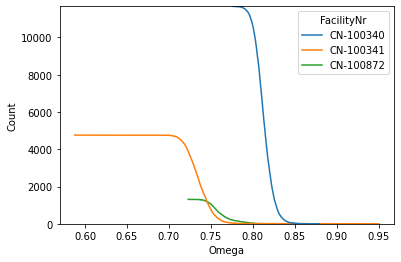

In [33]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count",
             complementary=True,   #也可以绘制经验互补CDF(1-CDF)
            
            )

## rugplot:

<Axes: xlabel='Omega'>

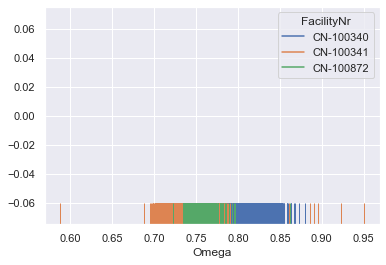

In [35]:
sns.set_theme()

# sns.kdeplot(data=dt,x="Omega")
sns.rugplot(data=dt,x="Omega",hue="FacilityNr",height=0.1)

# 分类统计图

## catplot: 分类型数据绘图

### Categorical scatterplots

In [ ]:
sns.catplot(data=dt,kind="swarm",x="Omega")

In [ ]:
sns.catplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
            kind="strip",
            y="Omega",
            x="StartDateTime",   #加这个参数会很慢
            hue="FacilityNr",
            height=6,
            aspect=1.5
           )
plt.tick_params(labelrotation=45)

### Categorical distribution plots: 
    "box":"boxplot"; 
    "violin": "violinplot"
    "boxen": "boxen"

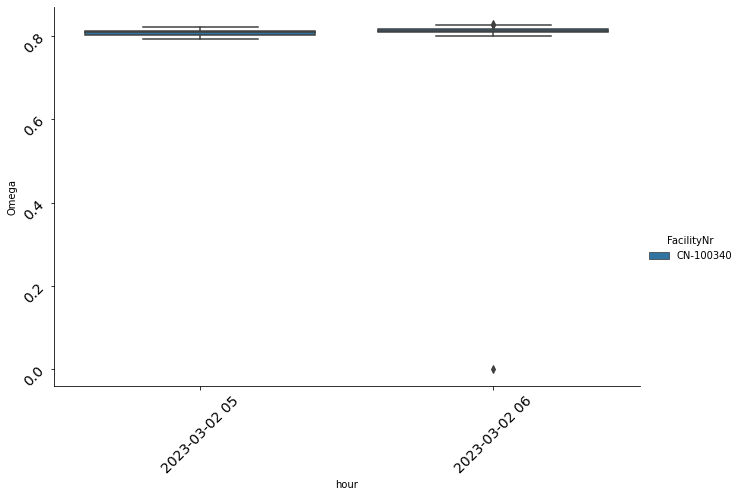

In [12]:
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以,那是因为它改的是配置rcfile, 把它放在代码的前面,作用就马上体现
sns.catplot(data=dt.reset_index().head(100),
           kind="box",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)


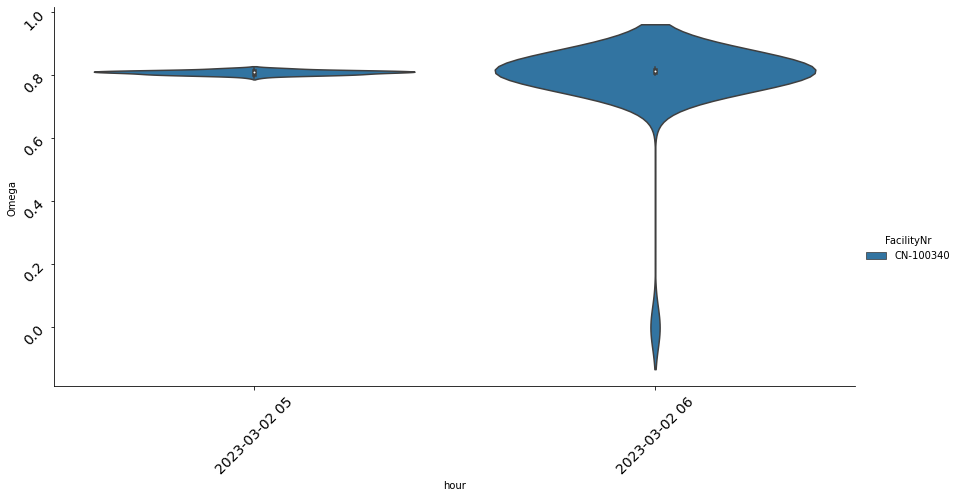

In [13]:
sns.catplot(data=dt.reset_index().head(100),
           kind="violin",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

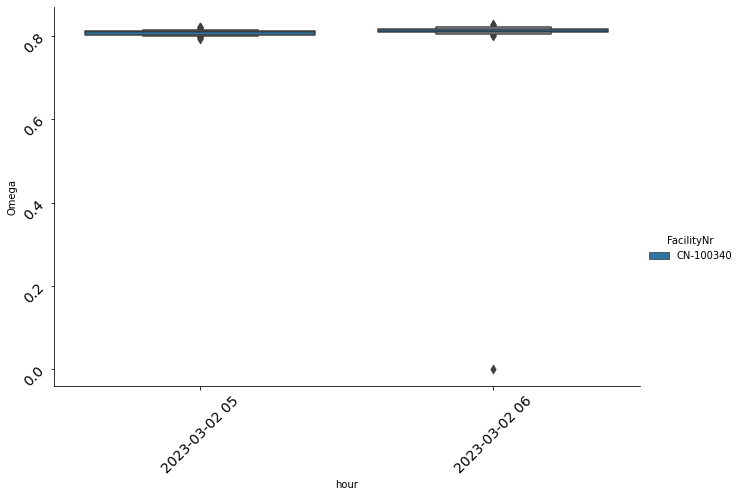

In [14]:
sns.catplot(data=dt.reset_index().head(100),
           kind="boxen",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

### Categrorical estimate plots:
    "point": "pointplot"
    "bar": "barplot"
    "count": "countplot"

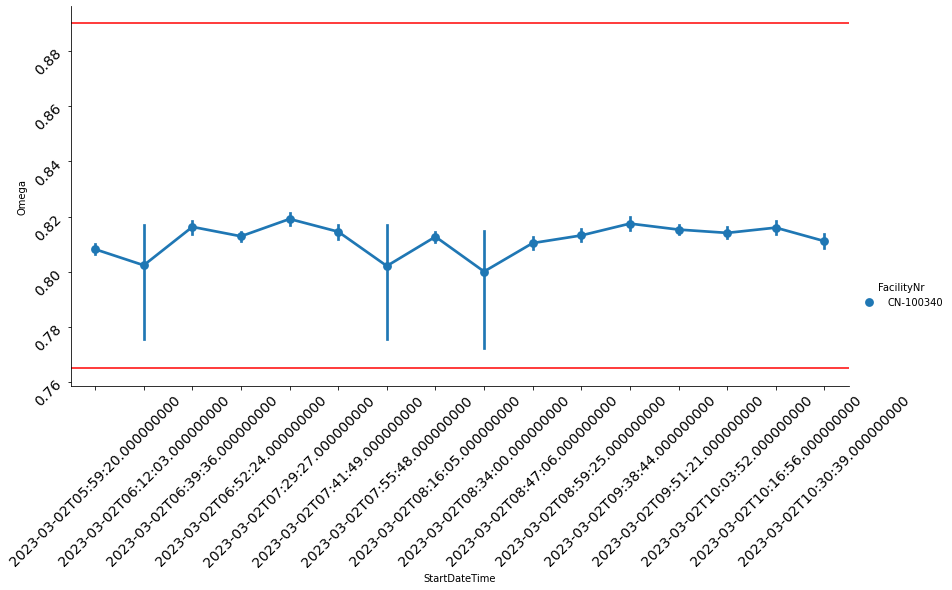

In [18]:
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
sns.catplot(data=dt[dt["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.mean
           )
plt.tick_params(labelsize=14,labelrotation=45)

plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

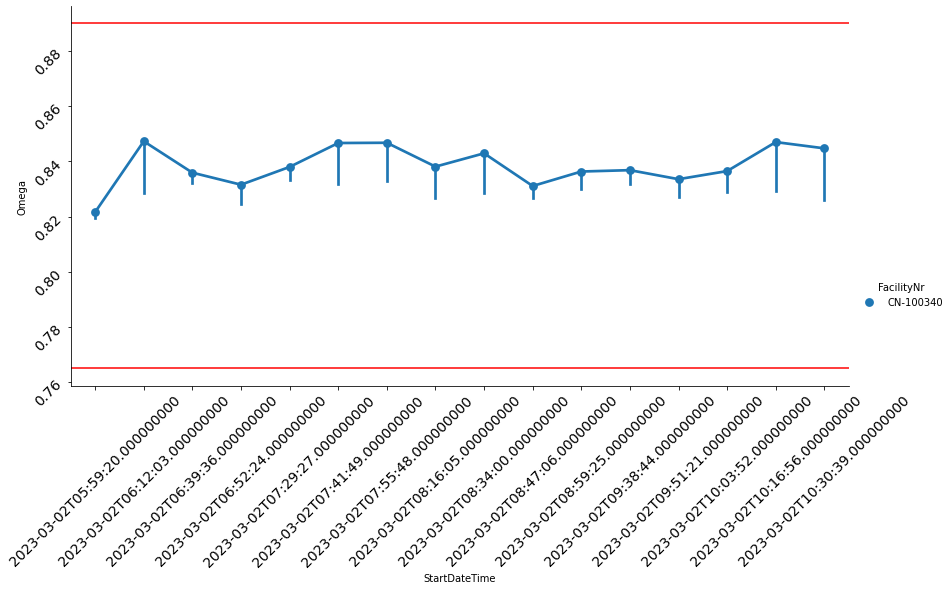

In [19]:
# mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
sns.catplot(data=dt[dt["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.max
           )
plt.tick_params(labelsize=14,labelrotation=45)

plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

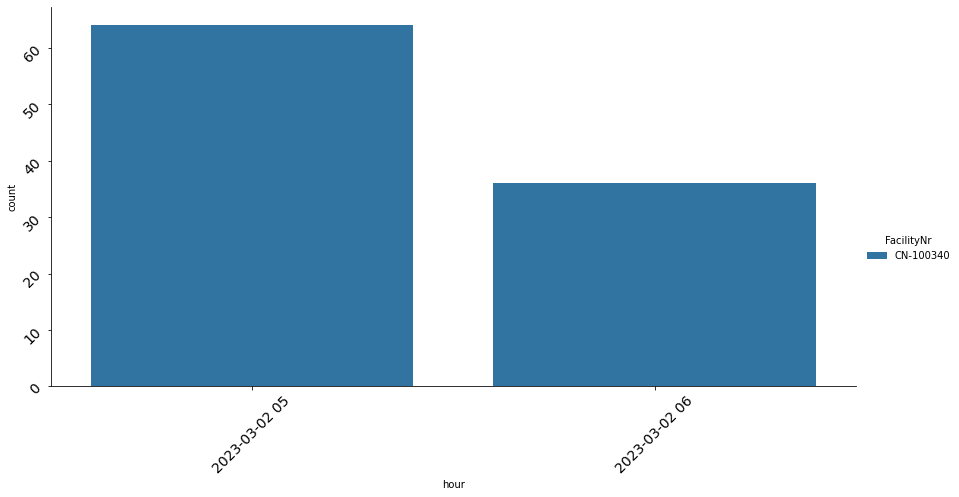

In [20]:

sns.catplot(data=dt.reset_index().head(100),
           kind="count",
           x="hour",
#            y="PostCleanPm10P0NumbConcMean_2",
           hue="FacilityNr",
#             saturation=0.5,
            ci=None,           #是否有胡须
            height=6,
            aspect=2
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

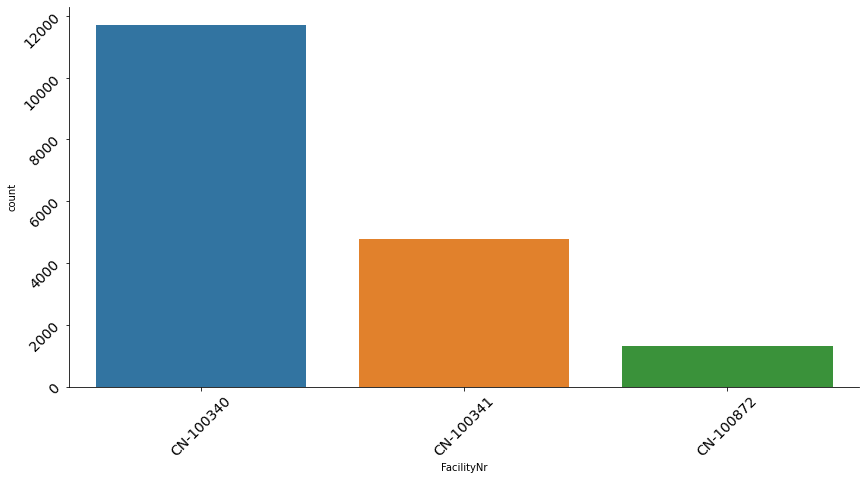

In [22]:
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
ax = sns.catplot(data=dt[dt["Omega"].notna()].reset_index(),
           kind="count",
           x="FacilityNr",
#            y="Omega",
#            hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           )
plt.tick_params(labelsize=14,labelrotation=45)

In [24]:
# ax

## stripplot

<Axes: ylabel='Omega'>

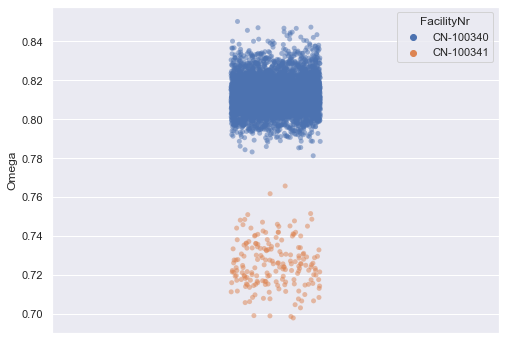

In [41]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=dt.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(5000),
#              x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              ax=ax,
              alpha=0.5
             )
# plt.tick_params(labelrotation=45)

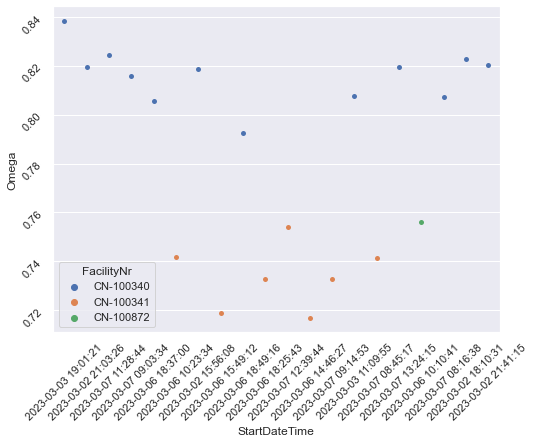

In [48]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=dt.reset_index().dropna(axis=0,how="any",subset=["Omega"]).sample(20),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              ax=ax
             )
plt.tick_params(labelrotation=45)

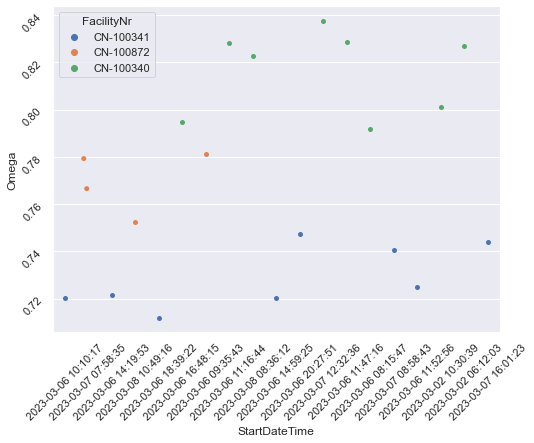

In [49]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=dt.reset_index().dropna(axis=0,how="any",subset=["Omega"]).sample(20),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              ax=ax
             )
plt.tick_params(labelrotation=45)

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:299: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(sub_data["x"], sub_data["y"], color=color, **plot_kws)


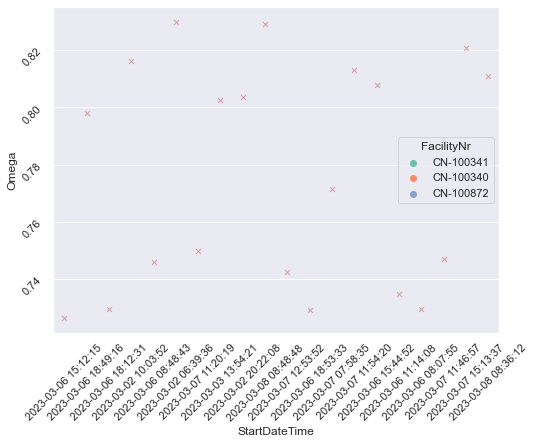

In [50]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=dt.reset_index().dropna(axis=0,how="any",subset=["Omega"]).sample(20),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              marker="x",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.5,
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)

Text(0.5, 1.0, 'Omega distribution')

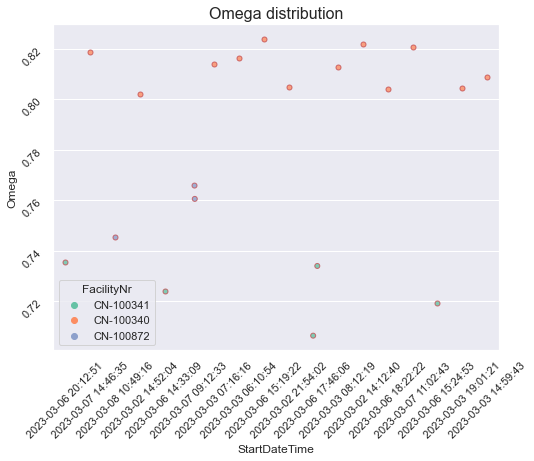

In [63]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax = sns.stripplot(data=dt.reset_index().dropna(axis=0,how="any",subset=["Omega"]).sample(20),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              marker="o",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.8,
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)
ax.set_title("Omega distribution",fontsize=16)

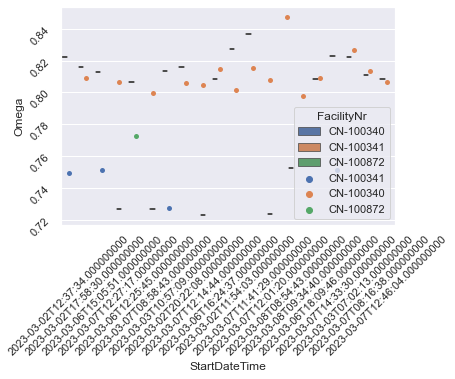

In [64]:
sns.boxplot(data=dt.dropna(axis=0,how="any",subset=["Omega"]).reset_index().sample(20),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=dt.dropna(axis=0,how="any",subset=["Omega"]).reset_index().sample(20),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)


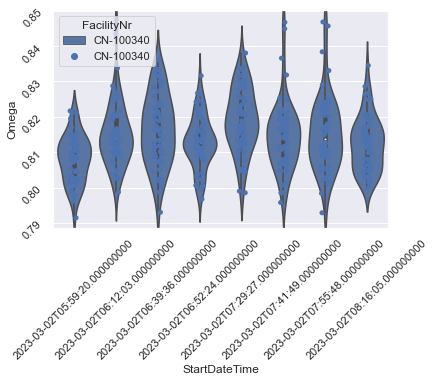

In [65]:
sns.violinplot(data=dt.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=dt.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)

## swarmplot:

In [ ]:
snsdata.head(2)

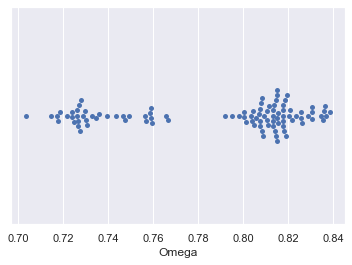

In [67]:
# 画一个简单的蜂群图
ax = sns.swarmplot(data=dt.reset_index().sample(100),
                  x = "Omega")

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_Sensi

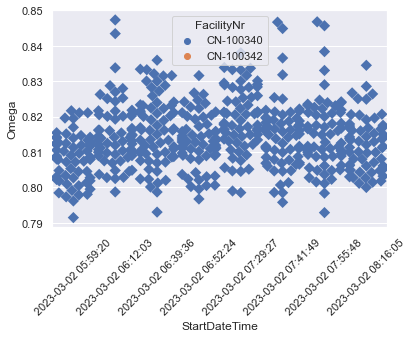

In [70]:
# 对蜂群进行分组:
ax = sns.swarmplot(data=dt.head(500).reset_index(),
                  x="StartDateTime",
                  y = "Omega",
                  hue="FacilityNr",
#                    dodge=True,      #比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                  hue_order = ["CN-100340","CN-100342"],
                   
#                    marker相关参数
                   size=8,
                   marker='D'
                  )
plt.tick_params(labelrotation=45,axis='x')

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


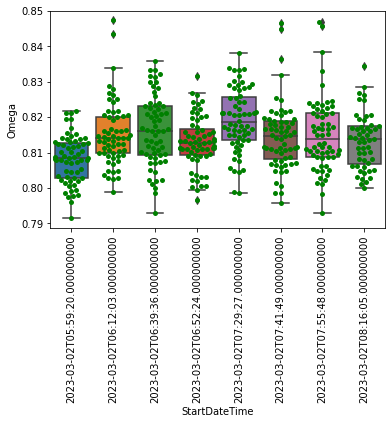

In [44]:
ax = sns.boxplot(data=dt.head(500).reset_index().query("Omega>0.2"),
                x="StartDateTime",
                y="Omega")
ax = sns.swarmplot(data=dt.head(500).reset_index().query("Omega>0.2"),
                 x="StartDateTime",
                 y = "Omega",
                   color='green'
                 )
ax.xaxis.set_tick_params(labelrotation=90)

## boxplot:

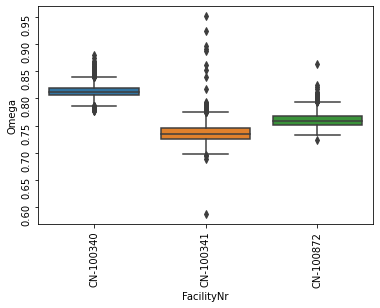

In [72]:
# hrlocator = dates.HourLocator()
# fmt = dates.DateFormatter("%Y%m%d %H")

sns.boxplot(data=dt.reset_index(),
                x="FacilityNr",
                y="Omega",
                # hue="FacilityNr",
                #  palette="Set3",
                )
# ax.xaxis.set_major_locator(hrlocator)
# ax.xaxis.set_major_formatter(fmt)
ax.set_title("Omega")
plt.tick_params(labelrotation=90)

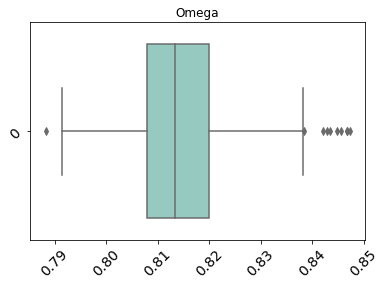

In [71]:
ax = sns.boxplot(data=dt.reset_index().head(800)["Omega"],
                 orient="h",
                 palette="Set3",
                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

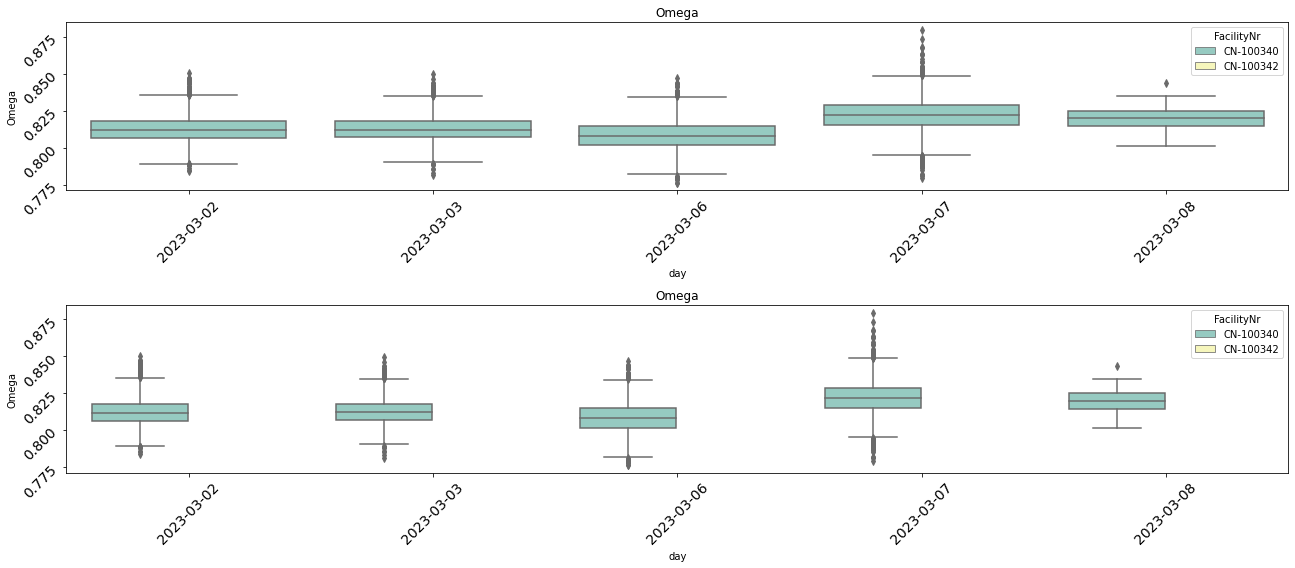

In [73]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=False,
                 ax = ax1,

                )
ax1.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)


ax2 = fig.add_subplot(212)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=True,  #default:True,比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                 ax = ax2,

                )
ax2.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

plt.tight_layout()


## boxenplot

In [74]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


<Axes: xlabel='sex', ylabel='bill_length_mm'>

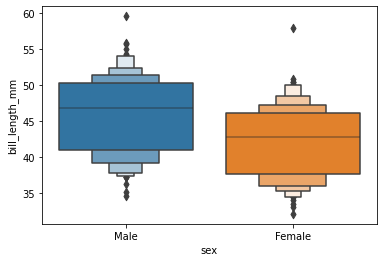

In [75]:
sns.boxenplot(data=penguins,
              x="sex",
              y="bill_length_mm",
             )

## violinplot:小提琴图

In [79]:
dt.head(2)

,ProductionOrder,BinCode,SubstrateSessionId,MeasureDataId,ContactId,EnvironmentSetPointId,SiteId,LimitsId,EnvironmentSetPointPos,ContactElapsedMs,...,SetupFacilityId,MachineName,ExecutionMode,FacilityId,FacilityNr,Description,MaterialNumber,MaterialAlias,hour,day
StartDateTime,,,,,,,,,,,,,,,,,,,,,
2023-03-02 05:59:20,90002900517,E4,7373.0,417781.0,7373.0,1.0,37.0,15.0,0.0,64.0,...,8.0,CN-SHA-M-100023,Production,8.0,CN-100340,NaN,3.000.593-005,SEN55-PM2.5,2023-03-02 05,2023-03-02
2023-03-02 05:59:20,90002900517,01,7373.0,417776.0,7373.0,1.0,32.0,15.0,0.0,64.0,...,8.0,CN-SHA-M-100023,Production,8.0,CN-100340,NaN,3.000.593-005,SEN55-PM2.5,2023-03-02 05,2023-03-02


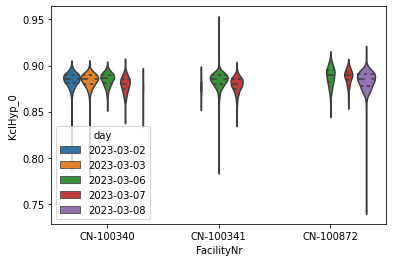

In [81]:
ax = sns.violinplot(data=dt,
              x = "FacilityNr",
              # order=["CN-100340","CN-100341","CN-100342"],
              y="KclHyp_0",
               
               hue="day",
               paleete="husl",
               # split=True,      #只有hue是两组数据的时候有效
               inner="quartile",   #“box”, “quartile”, “point”, “stick”, None
               scale="count",      #如何决定 plot的宽度,
                scale_hue=True,    #Scale the density relative to the counts across all bins:
             )

## pointplot

<Axes: xlabel='sex', ylabel='survived'>

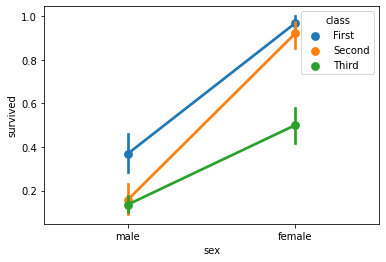

In [9]:
sns.pointplot(data=titanic,x="sex", y="survived", hue="class")

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## barplot

In [71]:
dt.head(2)

,ProductionOrder,BinCode,SubstrateSessionId,MeasureDataId,ContactId,EnvironmentSetPointId,SiteId,LimitsId,EnvironmentSetPointPos,ContactElapsedMs,IsSubstrateGradeProduction,AllWithin,X_OnSubstrate,Y_OnSubstrate,DutFirmwareMajorVersion,DutFirmwareMinorVersion,ResetOnPmCalibrationSuccessful,DeleteCalibrationSuccessful,DeviceId,DeviceIdInternal,T15,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,SetParametersVersionMajor,SetParametersVersionMinor,SetPeakBitShift,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,FanSpeedMedian_Arz,FanVoltageMedian_Arz,FanSpeedStd_Arz,FanVoltageStd_Arz,PmNormRate_Arz,CountRate_Arz,PmNormRateAligned_Arz,FanSpeedMedian_Kcl,FanVoltageMedian_Kcl,FanSpeedStd_Kcl,FanVoltageStd_Kcl,PmNormRate_Kcl,CountRate_Kcl,PmNormRateAligned_Kcl,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,AlphaMc_0p5,AlphaNc_0p5,AlphaMc_1p0,AlphaNc_1p0,AlphaMc_2p5,AlphaNc_2p5,AlphaMc_4p0,AlphaNc_4p0,AlphaMc_10p0,AlphaNc_10p0,BetaMc_0p5,BetaNc_0p5,BetaMc_1p0,BetaNc_1p0,BetaMc_2p5,BetaNc_2p5,BetaMc_4p0,BetaNc_4p0,BetaMc_10p0,BetaNc_10p0,WriteCalibrationSuccessful,Pm2p5NumbConcDutAccuracy_Remeasurement,Pm2p5MassConcDutAccuracy_Remeasurement,Pm2p5NumbConcDutNoise_Remeasurement,Pm2p5MassConcDutNoise_Remeasurement,Pm2p5NumbConcDutMean_Remeasurement,Pm2p5MassConcDutMean_Remeasurement,AutoCleaningInterval_Final,SaturatedBins_Kcl,SaturatedBins_Arz,OmegaInterceptMc_0p5,OmegaInterceptNc_0p5,OmegaInterceptMc_1p0,OmegaInterceptNc_1p0,OmegaInterceptMc_2p5,OmegaInterceptNc_2p5,OmegaInterceptMc_4p0,OmegaInterceptNc_4p0,OmegaInterceptMc_10p0,OmegaInterceptNc_10p0,OmegaInterceptNcDiff_Bin01,OmegaInterceptNcDiff_Bin02,OmegaInterceptNcDiff_Bin03,OmegaInterceptNcDiff_Bin04,OmegaInterceptNcDiff_Bin05,MD5,DutFirmwareMajorVersion_LTL,DutFirmwareMajorVersion_UTL,DutFirmwareMinorVersion_LTL,DutFirmwareMinorVersion_UTL,ResetOnPmCalibrationSuccessful_LTL,ResetOnPmCalibrationSuccessful_UTL,DeleteCalibrationSuccessful_LTL,DeleteCalibrationSuccessful_UTL,DeviceIdInternal_LTL,DeviceIdInternal_UTL,T15_LTL,T15_UTL,ProductionDateIsPass_LTL,ProductionDateIsPass_UTL,ProductionDateIsWritten_LTL,ProductionDateIsWritten_UTL,ReadLmCalibBin_LTL,ReadLmCalibBin_UTL,ReadPmCalibBin_LTL,ReadPmCalibBin_UTL,ReadAllBinsGoodQualityIndicator_LTL,ReadAllBinsGoodQualityIndicator_UTL,AutoCleaningInterval_Reset_LTL,AutoCleaningInterval_Reset_UTL,SetTargetFanSpeed_LTL,SetTargetFanSpeed_UTL,SetUpdateInterval_LTL,SetUpdateInterval_UTL,SetPeakThreshold_LTL,SetPeakThreshold_UTL,SetPeakClippingLimit_LTL,SetPeakClippingLimit_UTL,SetLaserSetPoint_LTL,SetLaserSetPoint_UTL,SetNoiseSuppression_LTL,SetNoiseSuppression_UTL,SetParametersVersionMajor_LTL,SetParametersVersionMajor_UTL,SetParametersVersionMinor_LTL,SetParametersVersionMinor_UTL,SetPeakBitShift_LTL,SetPeakBitShift_UTL,VoltageIn_LTL,VoltageIn_UTL,VoltageSclTx_LTL,VoltageSclTx_UTL,VoltageSdaRx_LTL,VoltageSdaRx_UTL,VoltageIfSelect_LTL,VoltageIfSelect_UTL,VoltageBoot_LTL,VoltageBoot_UTL,VoltageShieldTest_LTL,VoltageShieldTest_UTL,PhotoTicksLaserOff_LTL,PhotoTicksLaserOff_UTL,PhotoTicksLaserOn_LTL,PhotoTicksLaserOn_UTL,PhotoTicksDiff_LTL,PhotoTicksDiff_UTL,FanSpeedMedian_Arz_LTL,FanSpeedMedian_Arz_UTL,FanVoltageMedian_Arz_LTL,FanVoltageMedian_Arz_UTL,FanSpeedStd_Arz_LTL,FanSpeedStd_Arz_UTL,FanVoltageStd_Arz_LTL,FanVoltageStd_Arz_UTL,PmNormRate_Arz_LTL,PmNormRate_Arz

<Axes: xlabel='FacilityNr', ylabel='SetLaserSetPoint'>

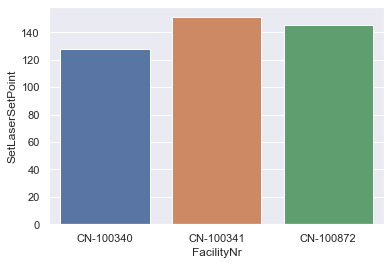

In [72]:
sns.barplot(data=dt[~dt["FacilityNr"].duplicated()],
            x="FacilityNr",
            y="SetLaserSetPoint"
           )

## countplot

<Axes: xlabel='FacilityNr', ylabel='count'>

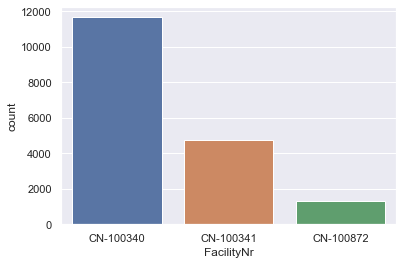

In [73]:
sns.countplot(data=dt,
              x="FacilityNr",
              # y=""
             )
# 同 dt.groupby('FacilityNr').size().plot.bar()

<Axes: xlabel='FacilityNr'>

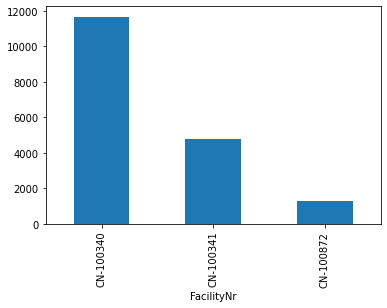

In [9]:
dt.groupby("FacilityNr").size().plot.bar()

# 分布+关系

## jointplot

In [12]:
sns.set()

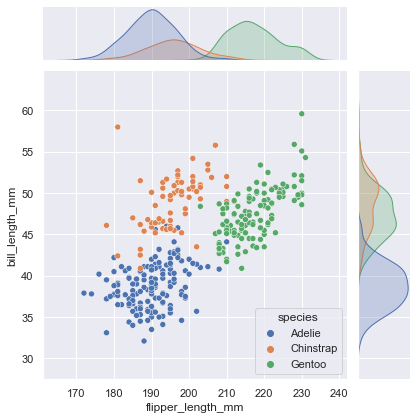

In [13]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

## pairplot

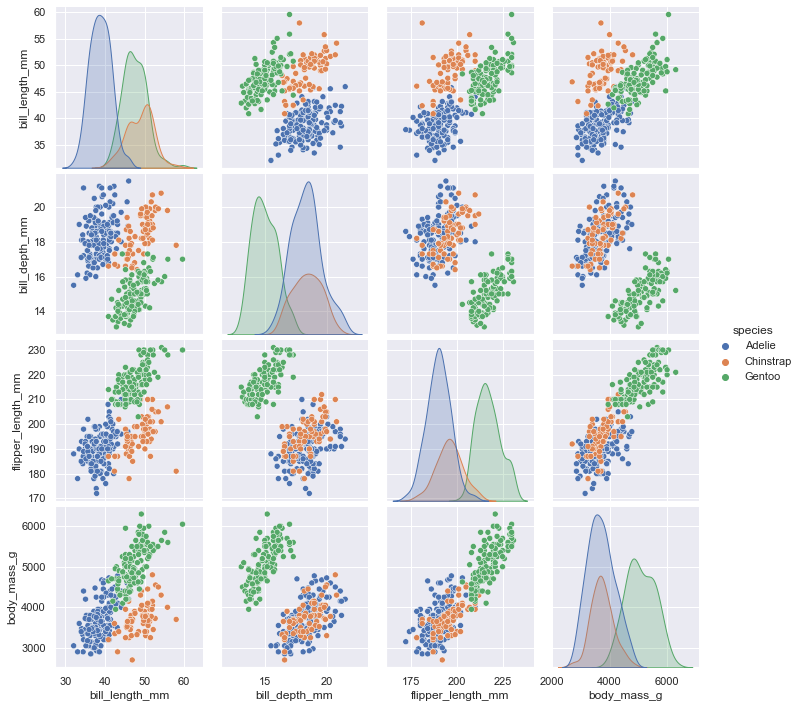

In [14]:
sns.pairplot(data=penguins,hue="species")

In [15]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [16]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# others

## regplot: 散点图+线性回归

<Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>

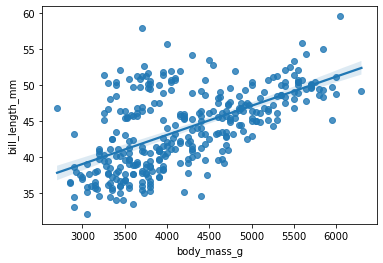

In [11]:
sns.regplot(data=penguins,
           x="body_mass_g",
           y="bill_length_mm")

## lmplot: 散点图+线性回归

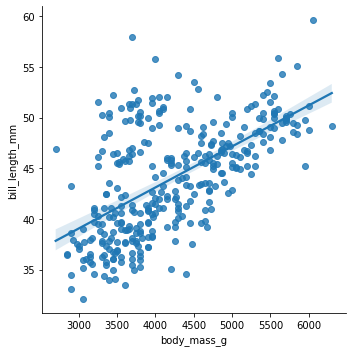

In [12]:
sns.lmplot(data=penguins,
           x="body_mass_g",
           y="bill_length_mm")

## residplot: 线性回归的残差

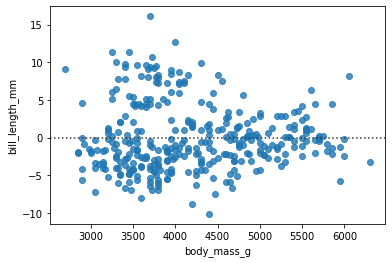

In [17]:
ax = sns.residplot(data=penguins,
           x="body_mass_g",
           y="bill_length_mm")
# ax.axhline(240,c='r')
# ax.axhline(-240,c='r')

## heatmap

In [8]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")

<Axes: xlabel='Task', ylabel='Model'>

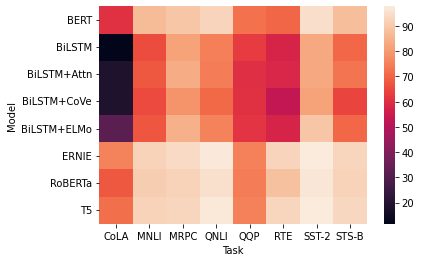

In [11]:
sns.heatmap(glue)

<Axes: xlabel='Task', ylabel='Model'>

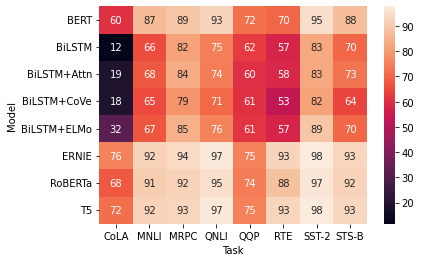

In [12]:
sns.heatmap(glue,annot=True)

<Axes: xlabel='Task', ylabel='Model'>

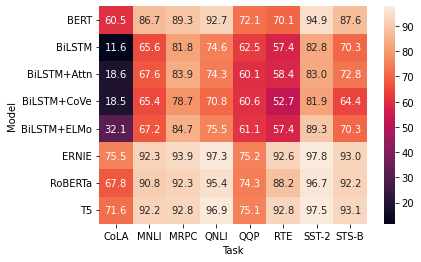

In [13]:
sns.heatmap(glue,annot=True,fmt=".1f")

<Axes: xlabel='Task', ylabel='Model'>

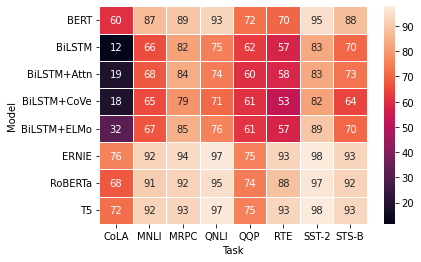

In [14]:
sns.heatmap(glue,annot=True,linewidth=0.5)

<Axes: xlabel='Task', ylabel='Model'>

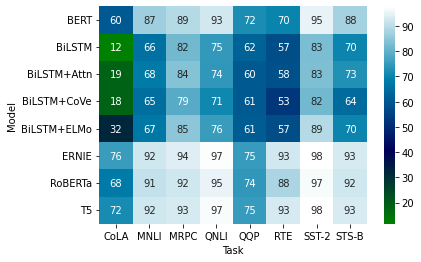

In [15]:
sns.heatmap(glue,annot=True,cmap='ocean')

## clustermap

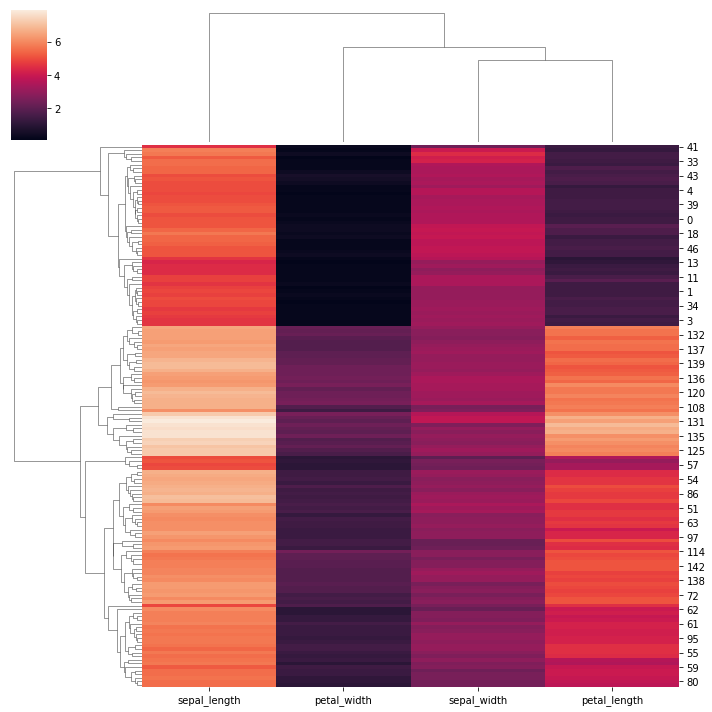

In [16]:
species = iris.pop("species")
sns.clustermap(iris)

## FacetGrid

In [221]:
def add_mean_line(data,var=None,**kws):
    if not var: return
    # print(data.head(2))
    m = np.mean(data[var])
    ax=plt.gca()
    ax.axvline(m,color='b',lw=3,ls='--')
    
    x_pos=0.65
    if m>5000: x_pos=0.2
    ax.text(x_pos,0.7,f'mean={m:.3f}',
           transform=ax.transAxes,
           color='r',fontweight='bold',fontsize=12)

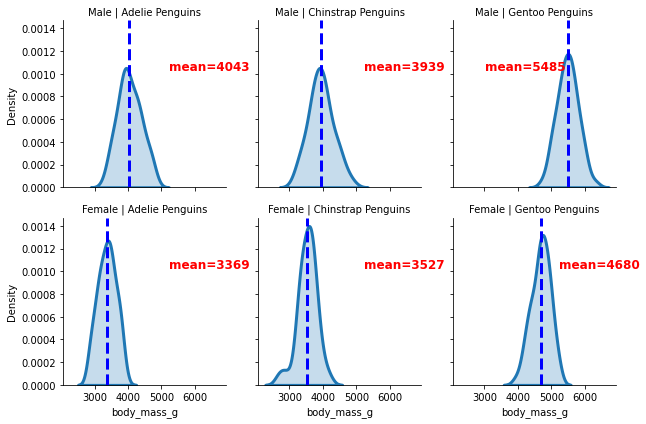

In [208]:
quantity = 'body_mass_g'

g = sns.FacetGrid(penguins,row='sex',col='species')
g.map_dataframe(sns.kdeplot,x=quantity,lw=3,fill=True)
g.map_dataframe(add_mean_line,var=quantity)
g.set_titles(row_template='{row_name}',col_template='{col_name} Penguins')

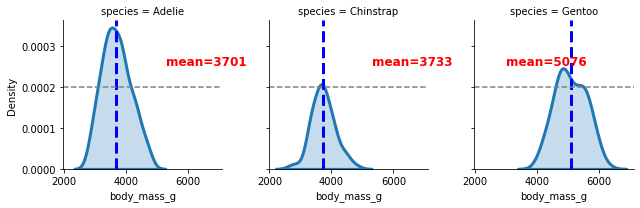

In [191]:
g = sns.displot(data=penguins,col='species',x=quantity,lw=3,fill=True,kind='kde',height=3,aspect=1)
g.map_dataframe(add_mean_line,var=quantity)
# g.set_xlabels(label='tst')
g.refline(y=0.0002)

In [199]:
dtt = dt[["Omega","ArzHyp_0","ArzHyp_0_UTL","ArzHyp_0_LTL","FacilityNr","MaterialNumber"]].sample(50)

In [262]:
def addNumber(data,**kws):
    n = data.shape[0]
    ax = plt.gca()
    ax.text(x=0.8,y=0.9,s="N="+str(n),transform=ax.transAxes,fontsize=16)

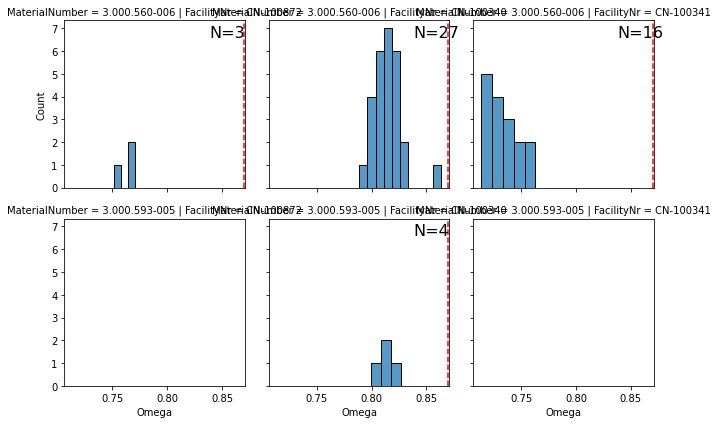

In [269]:

g = sns.FacetGrid(dtt,row='MaterialNumber',col='FacilityNr')
g.map_dataframe(sns.histplot,x='Omega')
g.map_dataframe(addNumber)
# g.map_dataframe(add_mean_line,var='Omega')
# g.set_titles(row_template='{row_name} Omega',col_template='{col_name} Density')
g.refline(x=0.87,color='r')
sns.despine(right=False,top=False)

# test

In [44]:
%matplotlib inline

In [25]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [30]:
tt = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm']].head(10).dropna()

In [33]:
tt.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
dtype: object

In [36]:
x = tt["bill_length_mm"].tolist()
y = tt['bill_depth_mm'].tolist()

In [16]:
import sys
import os

In [15]:
sys.path

['C:\\Python\\Matplotlib_Note',
 '',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\Lib\\site-packages',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\Scripts\\python38.zip',
 'C:\\Program Files\\WinPython38_64bit\\python-3.8.6.amd64\\DLLs',
 'C:\\Program Files\\WinPython38_64bit\\python-3.8.6.amd64\\lib',
 'C:\\Program Files\\WinPython38_64bit\\python-3.8.6.amd64',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\lib\\site-packages\\pylatus',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\lib\\site-packages\\win32',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\lib\\site-packages\\win32\\lib',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\lib\\site-packages\\Pythonwin',
 'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\Lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\osun\\.ipython']

In [20]:
sys.executable

'C:\\work\\virtenvs\\3p8_64bit_SensiPython_4p0\\Scripts\\python.exe'